In [19]:
import pandas as pd
A = pd.read_csv("C:\\Users\\Shrutika\\Desktop\\etl hive\\DS_py\\50_Startups.csv")

In [21]:
A[["RND","PROFIT"]][0:10]

,RND,PROFIT
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94
5,131876.90,156991.12
6,134615.46,156122.51
7,130298.13,155752.60
8,120542.52,152211.77
9,123334.88,149759.96


In [22]:
A.corr()

,RND,PROFIT
RND,1.0000,0.9729
PROFIT,0.9729,1.0000


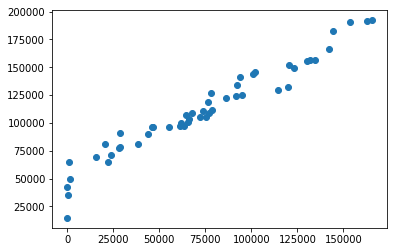

In [23]:
import matplotlib.pyplot as plt
plt.scatter(A.RND,A.PROFIT)
plt.show()

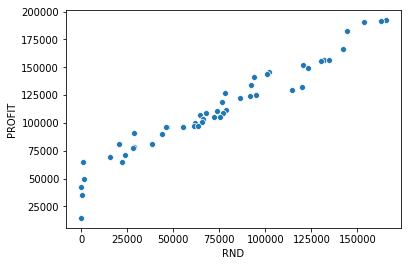

In [24]:
import seaborn as sb
sb.scatterplot(A.RND,A.PROFIT)

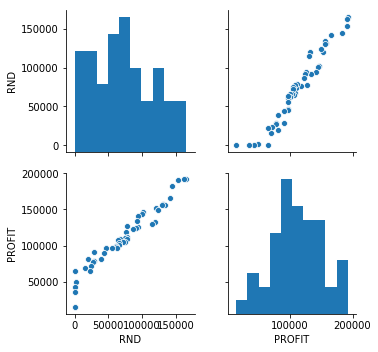

In [25]:
sb.pairplot(A)

In [26]:
X = A[["RND"]]
Y = A[["PROFIT"]]
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

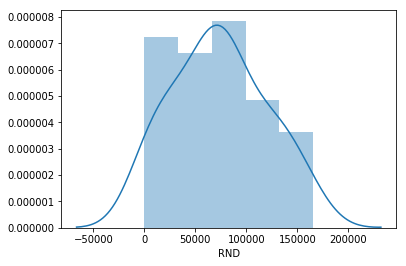

In [27]:
sb.distplot(A.RND)

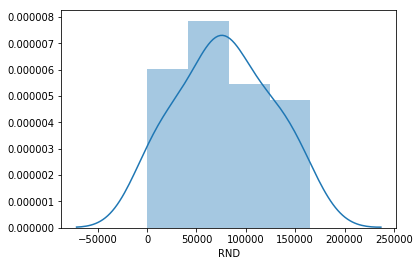

In [28]:
sb.distplot(xtrain.RND)

In [29]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest)
ytest["predicted_vals"] = pred

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
ytest

,PROFIT,predicted_vals
24,108552.04,114289.431759
43,69758.98,60395.155651
46,49490.75,47967.536136
38,81229.06,64532.239351
19,122776.86,122500.516397
37,89949.14,85411.258790
35,96479.51,87113.845300
25,107404.34,103447.831827
29,101004.64,104271.743678
9,149759.96,154830.261452


In [31]:
ytest["Residuals"] = ytest.PROFIT-ytest.predicted_vals

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(ytest.PROFIT,ytest.predicted_vals)

In [33]:
print("Mean absolute error in model is %.2f"%MAE)

Mean absolute error in model is 5979.51
